# PPD - projekt - 2

Zbiór danych o pacjentach badanych na chorobę tarczycy. 

## Przygotowanie danych

### Wczytanie zbioru

In [1]:
import numpy as np
import pandas as pd
from io import StringIO
import requests

headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/56.0.2924.76 Safari/537.36'}
url = "https://datahub.io/machine-learning/sick/r/sick.csv"
s = requests.get(url, headers = headers).text
df = pd.read_csv(StringIO(s))
df.head()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG,referral_source,Class
0,41.0,F,f,f,f,f,f,f,f,f,...,t,125.0,t,1.14,t,109.0,f,NaN,SVHC,negative
1,23.0,F,f,f,f,f,f,f,f,f,...,t,102.0,f,NaN,f,NaN,f,NaN,other,negative
2,46.0,M,f,f,f,f,f,f,f,f,...,t,109.0,t,0.91,t,120.0,f,NaN,other,negative
3,70.0,F,t,f,f,f,f,f,f,f,...,t,175.0,f,NaN,f,NaN,f,NaN,other,negative
4,70.0,F,f,f,f,f,f,f,f,f,...,t,61.0,t,0.87,t,70.0,f,NaN,SVI,negative


Na początek usuniemy kolumny niepotrzebne - pustą i tą, która dotyczy miejsca skierowania pacjenta (szpital?), który nie powinien wpływać na wyniki modelu. Następnie zamienimy wartości na 0 i 1 tam, gdzie jest to adekwatne.

In [2]:
# usunięcie kolumny referral_source i kolumny całej pustej
df.drop(['TBG', 'referral_source'], axis=1, inplace=True)

In [3]:
# zmiana f i t na 0 i 1
df.iloc[:,2:16] = df.iloc[:, 2:16] == 't'
df.iloc[:,2:16] = df.iloc[:,2:16].astype(int)
df.iloc[:,[16,18,20,22,24,26]] = df.iloc[:,[16,18,20,22,24,26]] == 't'
df.iloc[:,[16,18,20,22,24,26]] = df.iloc[:,[16,18,20,22,24,26]].astype(int)

/var/folders/vj/gw831g9d37783p_x81ddp7t80000gn/T/ipykernel_6098/3630264243.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.iloc[:,2:16] = df.iloc[:, 2:16] == 't'
/var/folders/vj/gw831g9d37783p_x81ddp7t80000gn/T/ipykernel_6098/3630264243.py:4: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.iloc[:,[16,18,20,22,24,26]] = df.iloc[:,[16,18,20,22,24,26]] == 't'


In [4]:
# zmiana targetu na 0 i 1
df.iloc[:,27] = df.iloc[:, 27] == 'sick'
df.iloc[:,27] = df.iloc[:, 27].astype(int)

/var/folders/vj/gw831g9d37783p_x81ddp7t80000gn/T/ipykernel_6098/3292064582.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.iloc[:,27] = df.iloc[:, 27] == 'sick'


In [5]:
df.head()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,Class
0,41.0,F,0,0,0,0,0,0,0,0,...,1,2.5,1,125.0,1,1.14,1,109.0,0,0
1,23.0,F,0,0,0,0,0,0,0,0,...,1,2.0,1,102.0,0,NaN,0,NaN,0,0
2,46.0,M,0,0,0,0,0,0,0,0,...,0,NaN,1,109.0,1,0.91,1,120.0,0,0
3,70.0,F,1,0,0,0,0,0,0,0,...,1,1.9,1,175.0,0,NaN,0,NaN,0,0
4,70.0,F,0,0,0,0,0,0,0,0,...,1,1.2,1,61.0,1,0.87,1,70.0,0,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3772 entries, 0 to 3771
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   age                        3771 non-null   float64
 1   sex                        3622 non-null   object 
 2   on_thyroxine               3772 non-null   int64  
 3   query_on_thyroxine         3772 non-null   int64  
 4   on_antithyroid_medication  3772 non-null   int64  
 5   sick                       3772 non-null   int64  
 6   pregnant                   3772 non-null   int64  
 7   thyroid_surgery            3772 non-null   int64  
 8   I131_treatment             3772 non-null   int64  
 9   query_hypothyroid          3772 non-null   int64  
 10  query_hyperthyroid         3772 non-null   int64  
 11  lithium                    3772 non-null   int64  
 12  goitre                     3772 non-null   int64  
 13  tumor                      3772 non-null   int64

Jedynie zmienna sex została jako object, reszta przyjmuje wartości numeryczne.

Wykres braków danych: 

<AxesSubplot: >

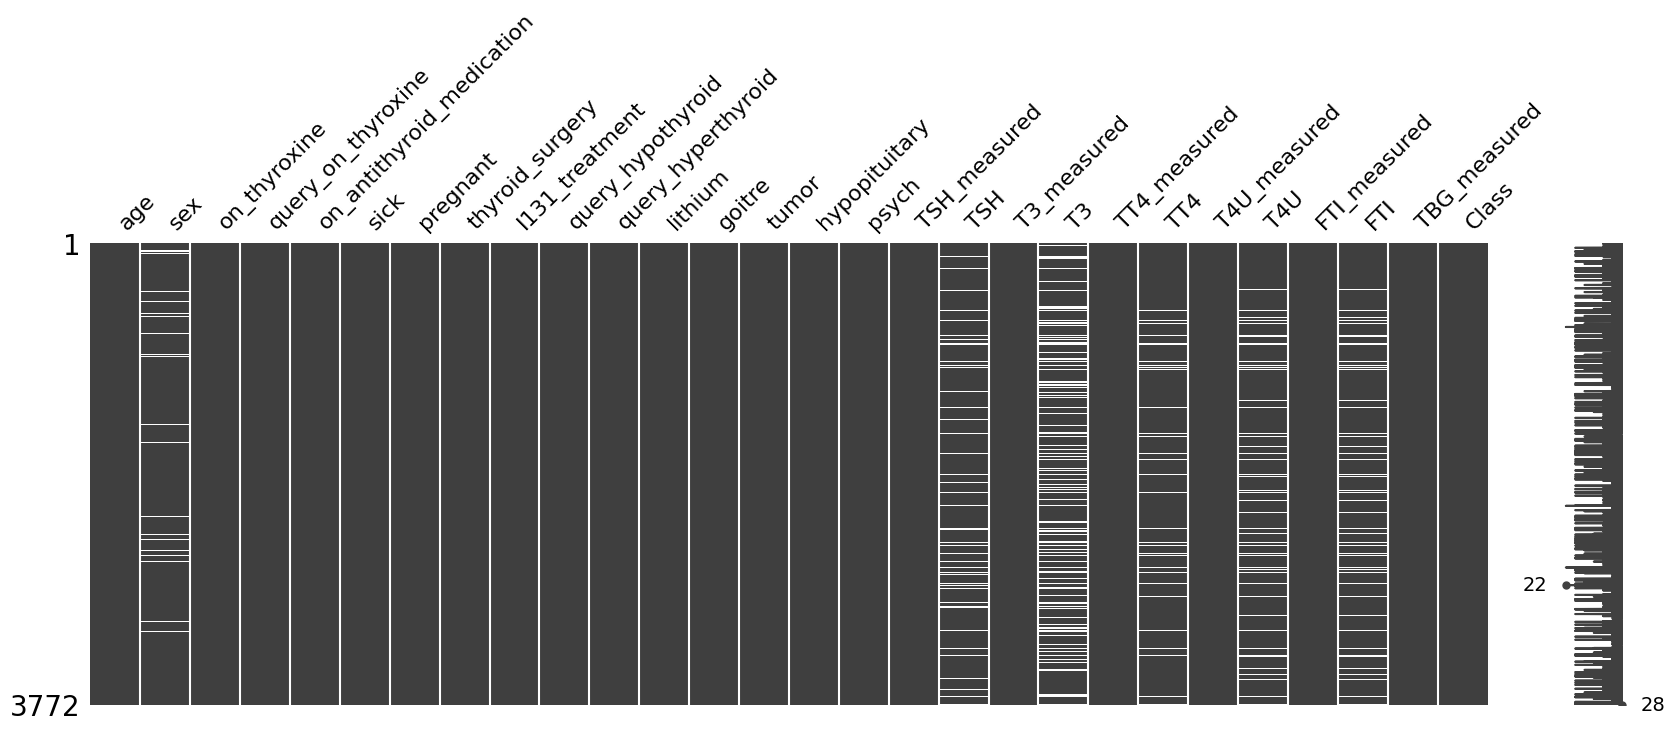

In [7]:
import missingno as mno
mno.matrix(df, figsize = (20, 6))

In [8]:
from copy import copy

In [9]:
# gradient boosting nie zezwala na dane kategoryczne, więc musimy zamienić zmienną sex na 0, 1 i NAN
def sex_encoding(data):
    df = data.copy()
    df.sex = df.sex.map({"M":0,"F":1,np.nan:np.nan})
    return df

In [10]:
data = sex_encoding(df)

Mając same zmienne numeryczne i odrzucone niepoprawne kolumny zostało zająć się wartościami odstającymi. Jest tylko taka jedna w kolumnie wieku.

In [11]:
# usunięcie wiersza z wartością age==455
data1 = copy(data)
data1 = data1[data1.age != 455]

In [12]:
# zmiana wartości age==455 na NA
data2 = copy(data)
data2.age = data2.age.replace(455, np.nan)

Powstały dwa zbiory do dalszej pracy. 

### Podział na zbiór treningowy i testowy

Podział taki sam jak w SAS nie miał wykorzystania za bardzo w pythonie. Zdecydowano się na pozbycie zbioru walidacyjnego. Wybrany podział to 75% dla zbioru treningowego, a reszta dla zbioru testowego. Do podziału wybrano zbiór z wiekiem zamienionym na 455.

In [13]:
#from fast_ml.model_development import train_valid_test_split
#X_train, y_train, X_valid, y_valid, X_test, y_test = train_valid_test_split(data2, 
#                                                                            target = 'Class', 
#                                                                            train_size = 0.6, 
#                                                                            valid_size = 0.2, 
#                                                                            test_size = 0.2, 
#                                                                            random_state=123)

In [14]:
# decydujemy się na podział bez zbioru walidacyjnego - w pythonie niekoniecznie z niego korzystamy!
y = np.array(data2['Class'])
X = data2.drop(['Class'],axis=1)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.75, test_size = 0.25, random_state=123)

In [15]:
def np_counts(X):
    unique, counts = np.unique(X, return_counts=True)
    print(np.asarray((unique, counts)).T)

In [16]:
np_counts(y_train)
#np_counts(y_valid)
np_counts(y_test)

[[   0 2653]
 [   1  176]]
[[  0 888]
 [  1  55]]


Podział jest w miarę równy.

### Eksploracja danych treningowych 

Powtarzamy część EDA dla zbioru treningowego, aby zdecydować o preprocessingu. Jak wiadomo dostęp ma się tylko do danych treningowych w realnych sytuacjach, więc o zbiorze testowym nie wiemy nic. Stąd niektóre wyniki i analizy zostaną ponownie przeprowadzone.

#### Charakterystyki

<AxesSubplot: >

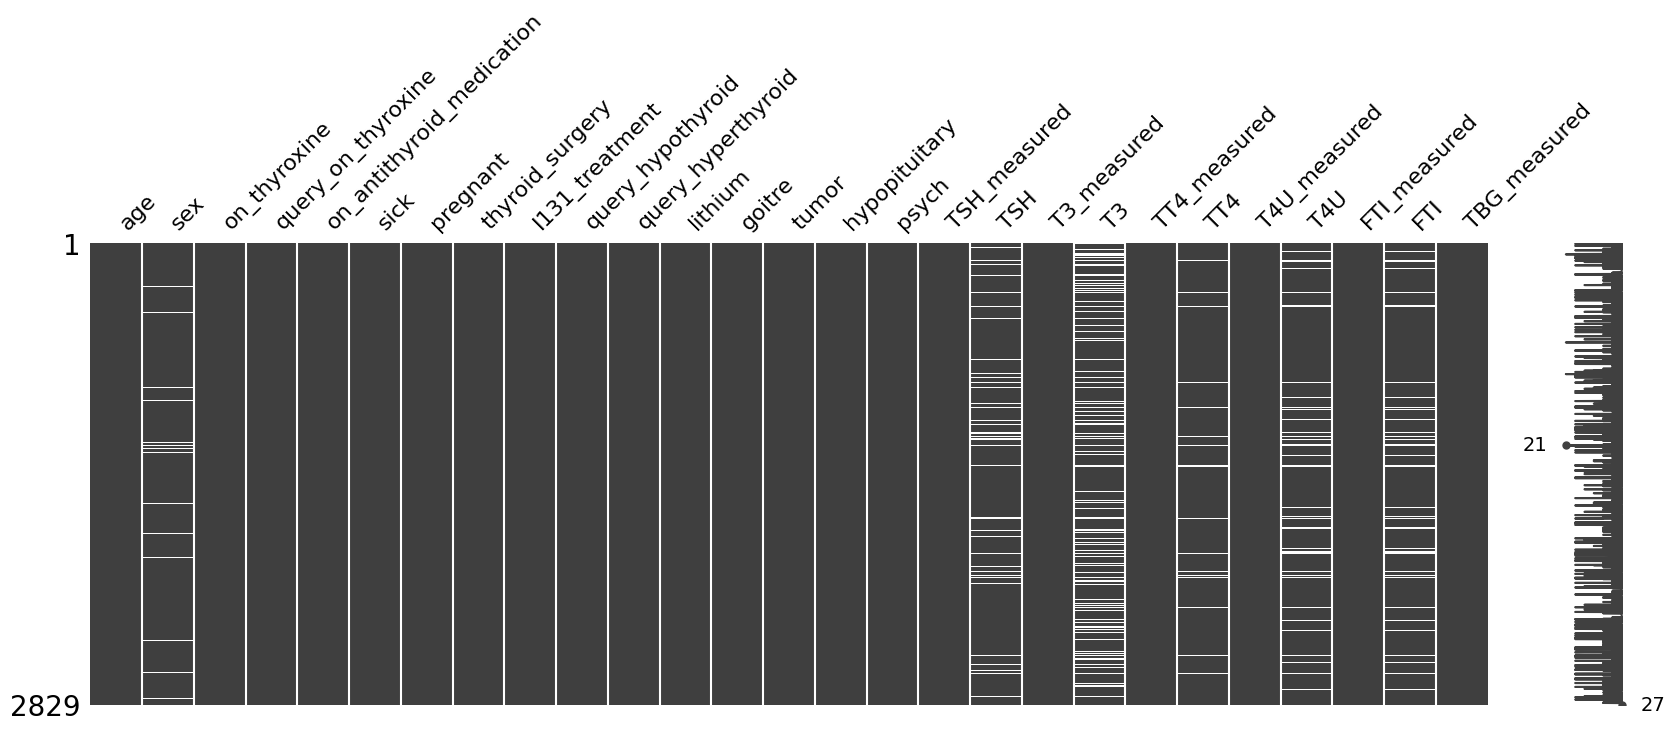

In [17]:
mno.matrix(X_train, figsize = (20, 6))

In [18]:
X_train.sex.value_counts()

1.0    1886
0.0     833
Name: sex, dtype: int64

In [19]:
X_train.shape

(2829, 27)

In [20]:
X_train.describe()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured
count,2827.000000,2719.000000,2829.000000,2829.000000,2829.000000,2829.000000,2829.000000,2829.000000,2829.000000,2829.000000,...,2554.000000,2829.000000,2231.000000,2829.000000,2656.000000,2829.000000,2540.000000,2829.000000,2541.000000,2829.0
mean,51.719137,0.693637,0.125840,0.014139,0.011665,0.037116,0.014139,0.014139,0.016614,0.062920,...,5.427831,0.788618,2.010013,0.938848,108.253389,0.897844,0.996651,0.898197,110.238371,0.0
std,19.012837,0.461067,0.331727,0.118086,0.107391,0.189078,0.118086,0.118086,0.127841,0.242862,...,26.419595,0.408361,0.841554,0.239652,36.088878,0.302907,0.197380,0.302442,33.497786,0.0
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.005000,0.000000,0.050000,0.000000,2.000000,0.000000,0.250000,0.000000,2.000000,0.0
25%,36.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.500000,1.000000,1.600000,1.000000,88.000000,1.000000,0.880000,1.000000,93.000000,0.0
50%,54.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.400000,1.000000,2.000000,1.000000,103.000000,1.000000,0.980000,1.000000,107.000000,0.0
75%,67.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2.700000,1.000000,2.300000,1.000000,125.000000,1.000000,1.090000,1.000000,124.000000,0.0
max,94.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,530.000000,1.000000,10.600000,1.000000,430.000000,1.000000,2.320000,1.000000,395.000000,0.0


In [21]:
NA_ratio_numcolumns = X_train.select_dtypes(include='float64').isnull().mean()
NA_ratio_numcolumns.round(4) * 100

age     0.07
sex     3.89
TSH     9.72
T3     21.14
TT4     6.12
T4U    10.22
FTI    10.18
dtype: float64

In [22]:
NA_count_numcolumns = X_train.select_dtypes(include='float64').isnull().sum()

#### Eksploracja wykresów

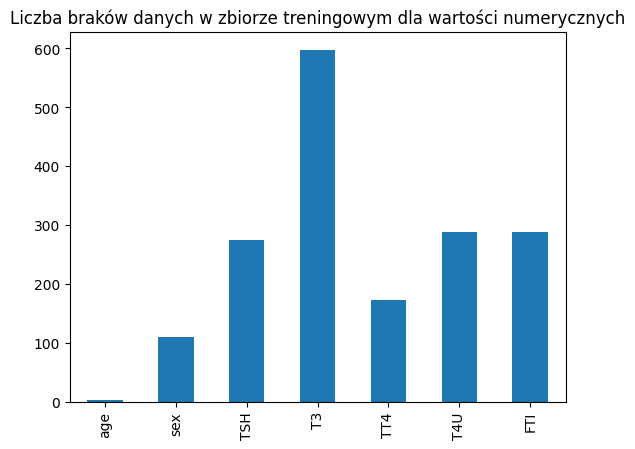

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

NA_count_numcolumns.plot(kind='bar')
plt.title('Liczba braków danych w zbiorze treningowym dla wartości numerycznych')
plt.show()

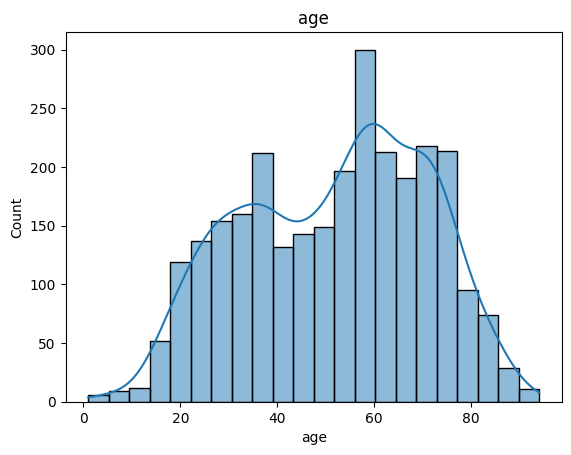

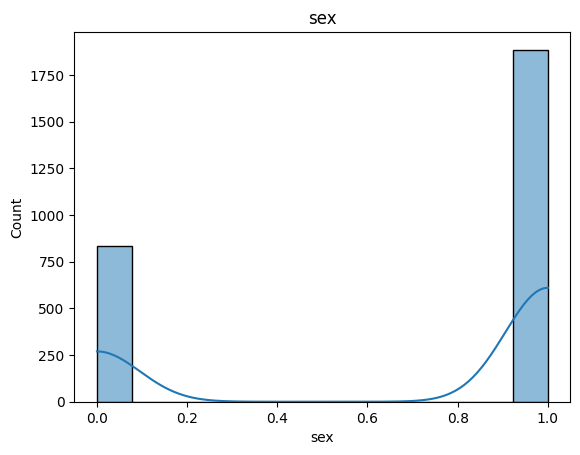

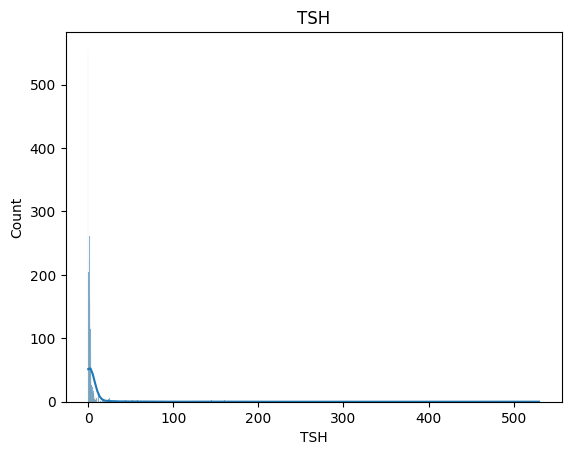

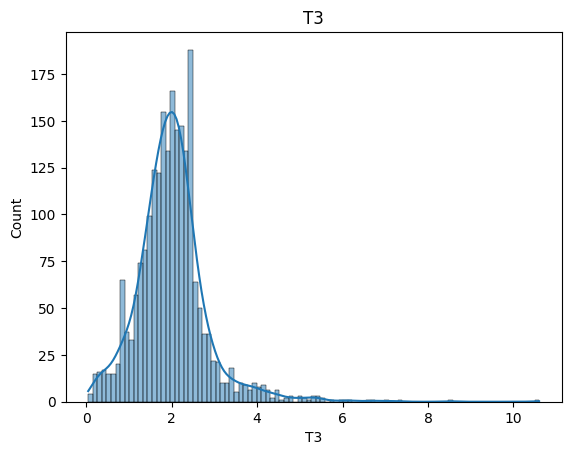

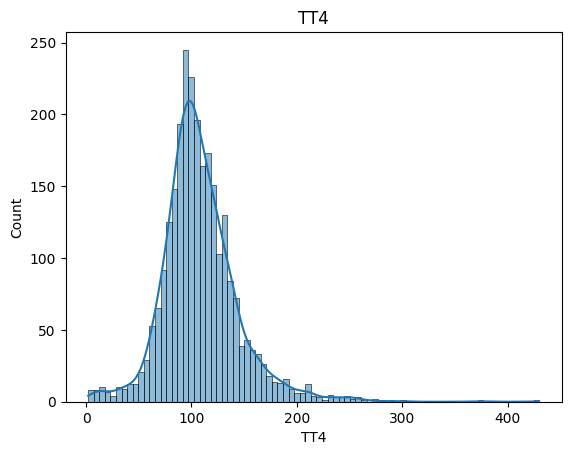

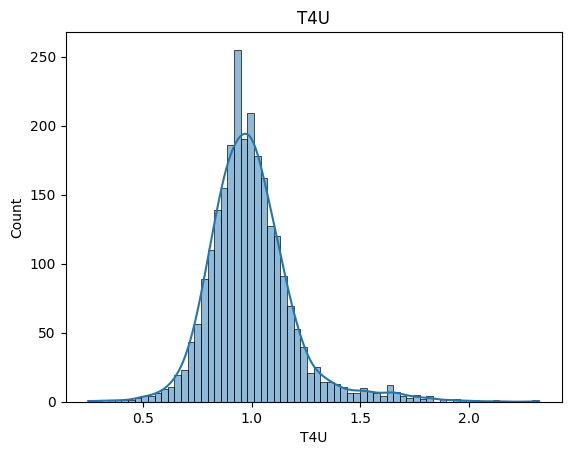

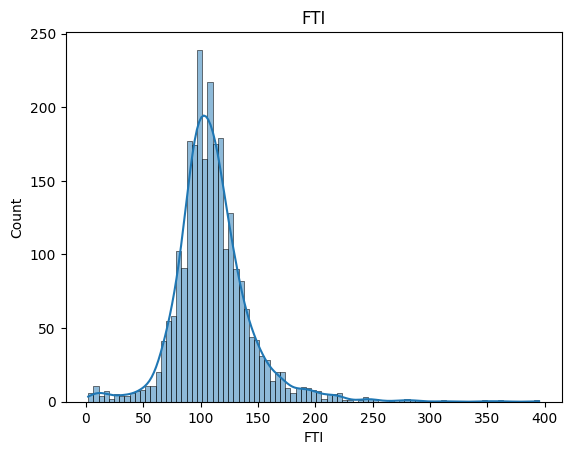

In [24]:
num_columns_names = X_train.select_dtypes(include='float64').columns

for col in num_columns_names:
    col_plot = sns.histplot(X_train[col], kde=True)
    col_plot.set_title(col)
    plt.show()

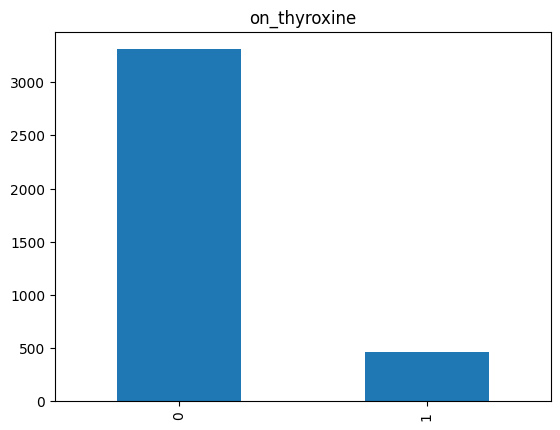

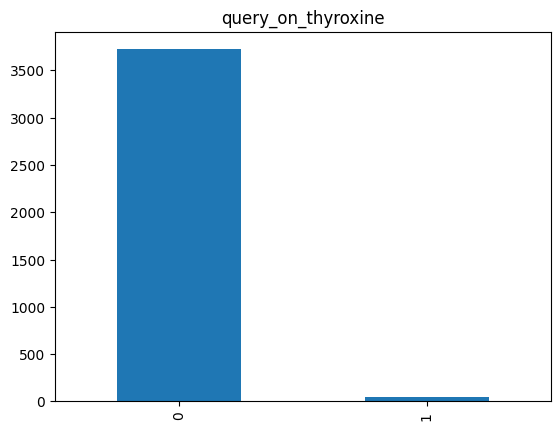

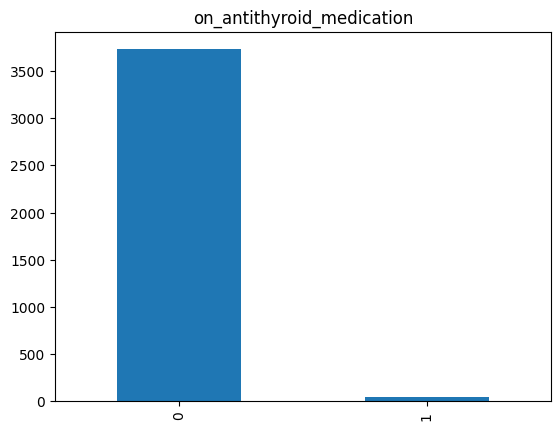

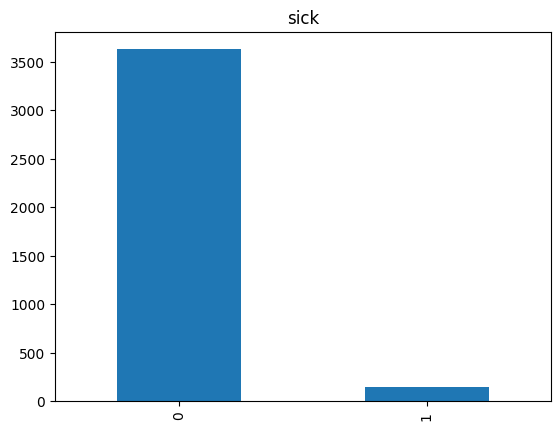

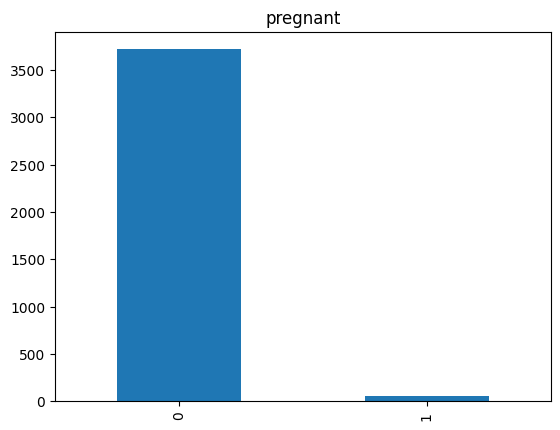

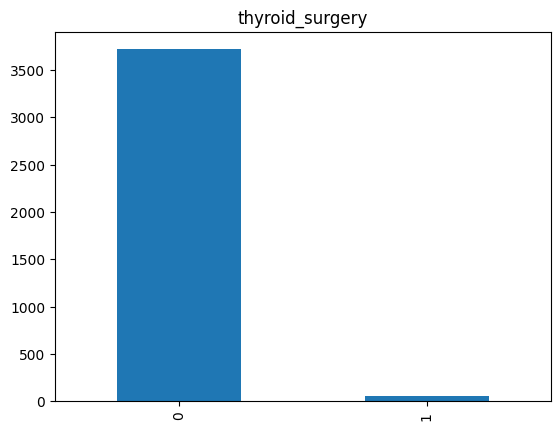

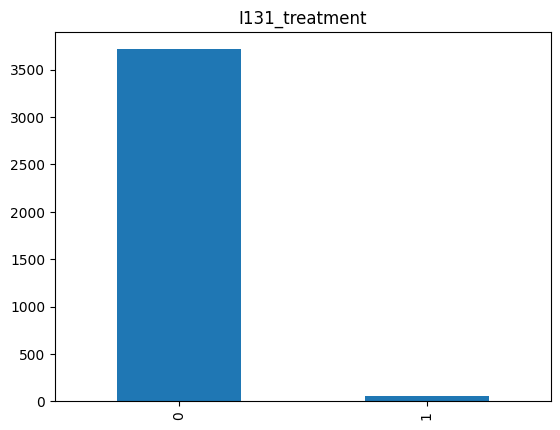

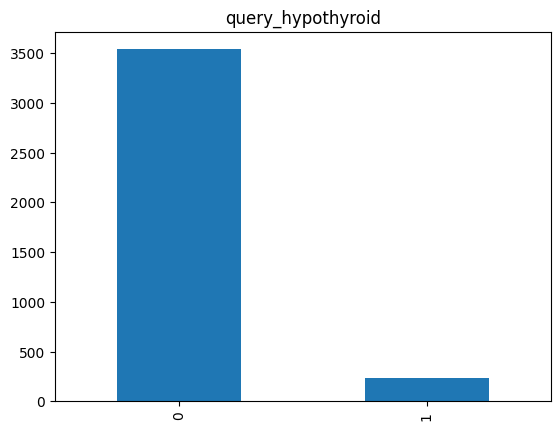

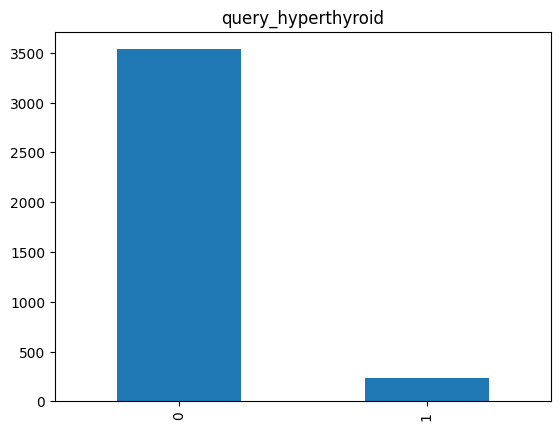

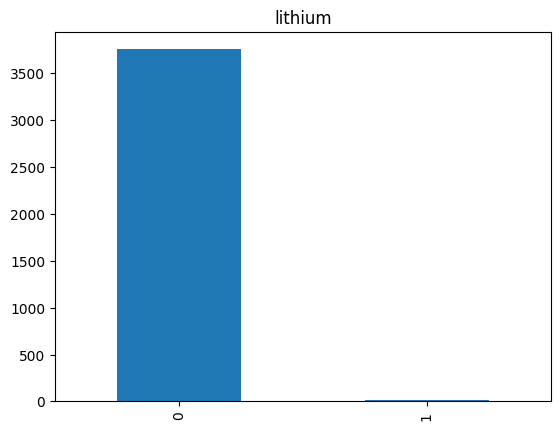

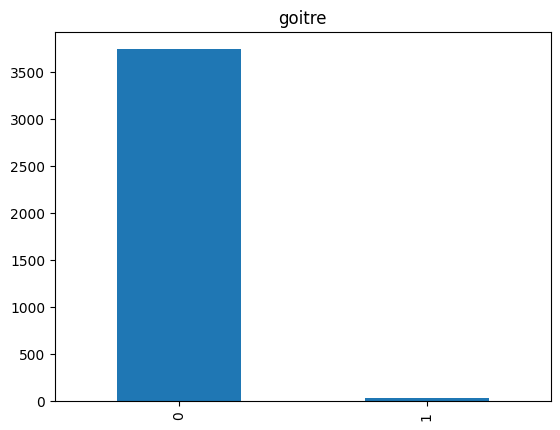

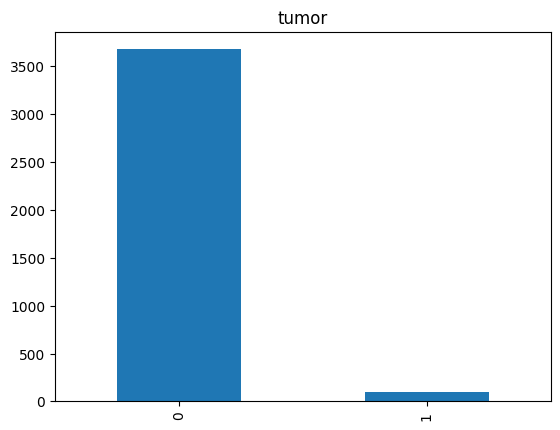

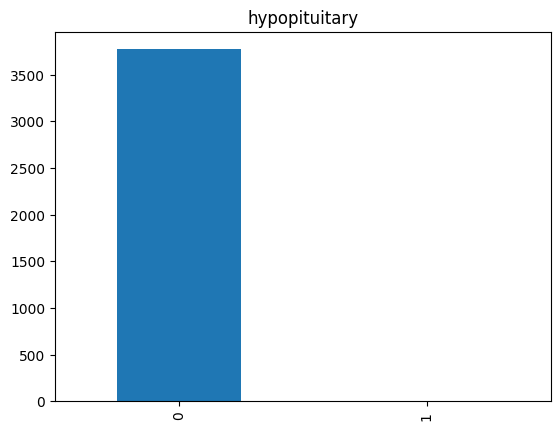

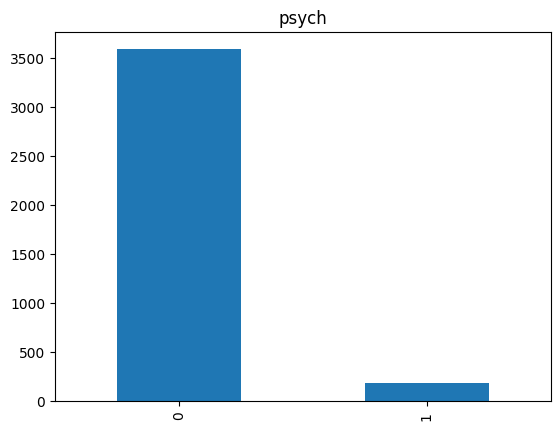

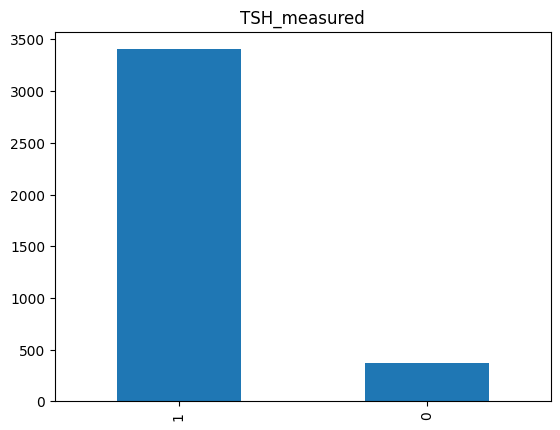

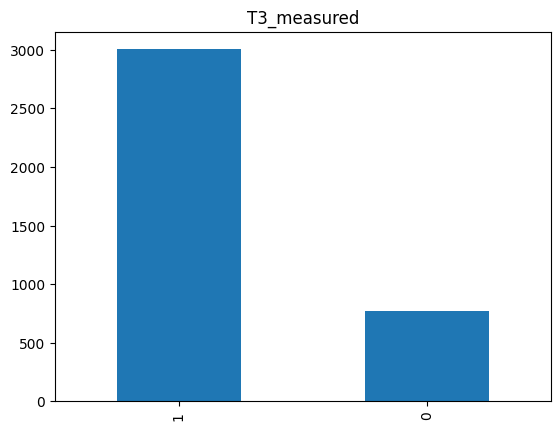

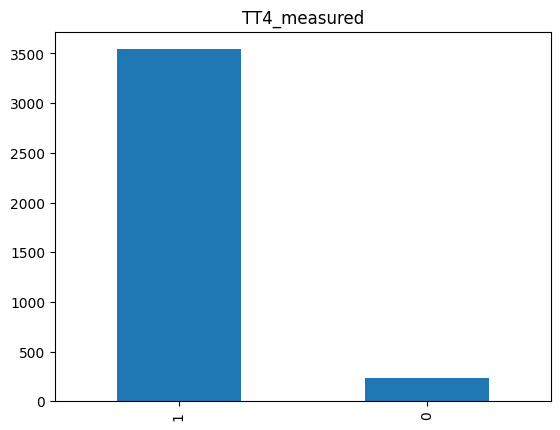

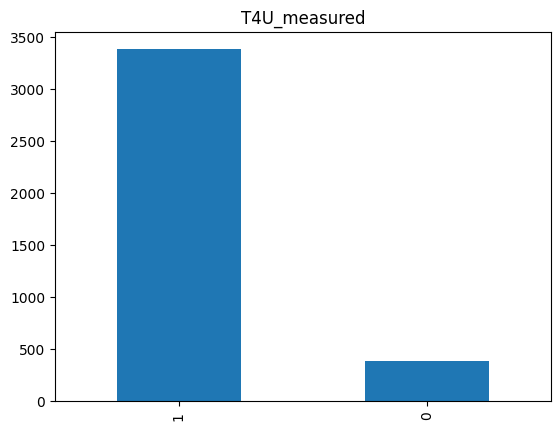

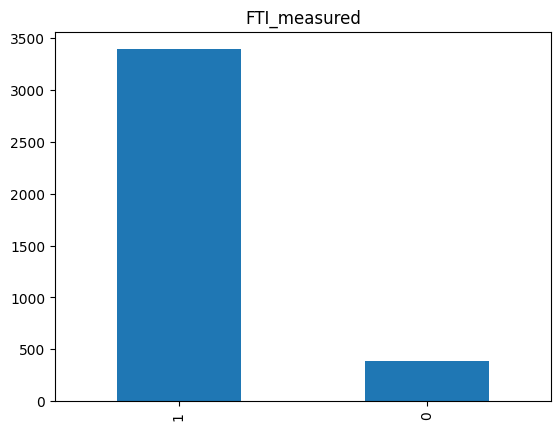

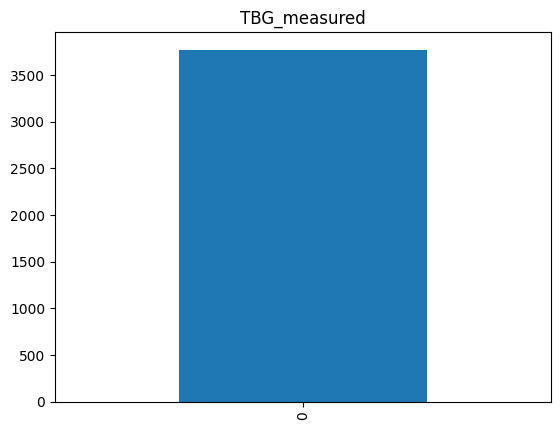

In [25]:
nonum_columns_names = X_train.select_dtypes(exclude='float64').columns

for col in nonum_columns_names:
    df[col].value_counts().plot(kind='bar')
    plt.title(col)
    plt.show()

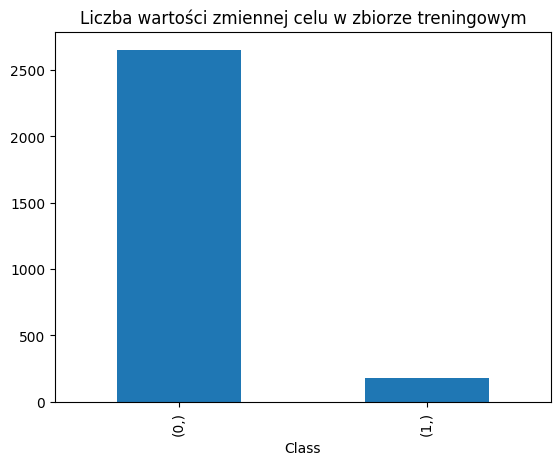

In [26]:
pd.DataFrame(y_train, columns=['Class']).value_counts().plot(kind='bar')
plt.title('Liczba wartości zmiennej celu w zbiorze treningowym')
plt.show()

#### Korelacja zmiennych

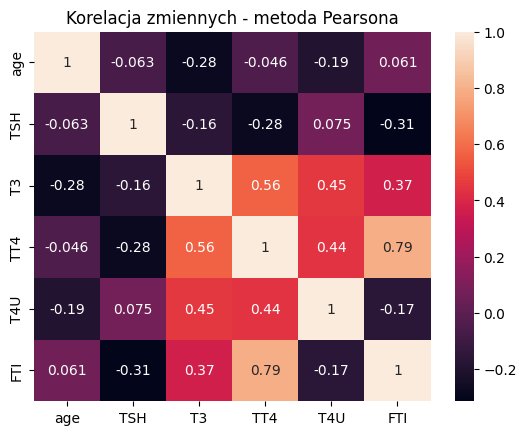

In [27]:
correlation = X_train[['age', 'TSH', 'T3', 'TT4', 'T4U', 'FTI']].corr(method ='pearson')
#Korelacja dla tylko zmiennych ciągłych + target
ax=sns.heatmap(correlation, 
            xticklabels=correlation.columns,
            yticklabels=correlation.columns, annot=True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom, top)
ax.set_title('Korelacja zmiennych - metoda Pearsona')
plt.show()

#### Chi-kwadrat

Tak jak w SAS, chcemy sprawdzić ważność zmiennych. Ze względu na inny podział zbioru wyniki mogą się różnić między analizami.

In [28]:
from scipy.stats import chi2_contingency

In [29]:
column_names = X_train.columns

In [30]:
chi_plot_data = list()
for col in column_names:
    data_cont = pd.crosstab(y_train, X_train[col])
    stat, p, dof, expected = chi2_contingency(data_cont)
    chi_plot_data.append([col, p])
    if p <= 0.05:
        print(col, ": p-value = " + str(p))

age : p-value = 2.7410900896640103e-12
sex : p-value = 0.0034725904420509846
on_thyroxine : p-value = 0.0029949805302689233
sick : p-value = 4.0586888056008674e-05
query_hypothyroid : p-value = 0.002514096589782766
TSH_measured : p-value = 0.00012382247328289635
T3_measured : p-value = 3.6909539111991056e-11
T3 : p-value = 4.669869336700679e-232
TT4_measured : p-value = 0.0008563448054964699
TT4 : p-value = 2.442637315670692e-06
T4U_measured : p-value = 0.0005313467590583085
T4U : p-value = 4.169277476231595e-14
FTI_measured : p-value = 0.0005528554673367465
FTI : p-value = 5.0311079055284664e-05


In [31]:
chi_plot_data = pd.DataFrame(chi_plot_data, columns=['ColName', 'P-value'], index=column_names).sort_values('P-value')

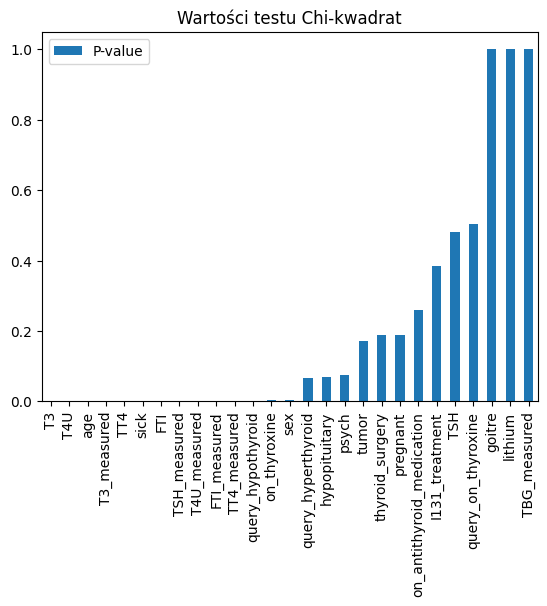

In [32]:
chi_plot_data.plot(kind='bar')
plt.title('Wartości testu Chi-kwadrat')
plt.show()

Wiek ma niższe p-value niż w przypadku SASa. Stąd widzimy już różnicę w analizie.

In [33]:
from scipy import stats

def f_test(x, y, alt="two_sided"):
    df1 = len(x) - 1
    df2 = len(y) - 1
    f = x.var() / y.var()
    if alt == "greater":
        p = 1.0 - stats.f.cdf(f, df1, df2)
    elif alt == "less":
        p = stats.f.cdf(f, df1, df2)
    else:
        p1 = 1.0 - stats.f.cdf(f, df1, df2)
        p2 = stats.f.cdf(f, df1, df2)
        p = 2*min(p1, p2)
    return round(f,2), round(p,2)

In [34]:
for col in column_names[2:]:
    f, p = f_test(y_train, X_train[col])
    print(f'{col}\t{f}\t{p}')

on_thyroxine	0.53	0.0
query_on_thyroxine	4.18	0.0
on_antithyroid_medication	5.06	0.0
sick	1.63	0.0
pregnant	4.18	0.0
thyroid_surgery	4.18	0.0
I131_treatment	3.57	0.0
query_hypothyroid	0.99	0.77
query_hyperthyroid	0.97	0.48
lithium	13.81	0.0
goitre	6.4	0.0
tumor	2.52	0.0
hypopituitary	165.05	0.0
psych	1.29	0.0
TSH_measured	0.66	0.0
TSH	0.0	0.0
T3_measured	0.35	0.0
T3	0.08	0.0
TT4_measured	1.02	0.68
TT4	0.0	0.0
T4U_measured	0.64	0.0
T4U	1.5	0.0
FTI_measured	0.64	0.0
FTI	0.0	0.0
TBG_measured	inf	0.0


/var/folders/vj/gw831g9d37783p_x81ddp7t80000gn/T/ipykernel_6098/902630575.py:6: RuntimeWarning: divide by zero encountered in double_scalars
  f = x.var() / y.var()


#### Test ANOVA i Turkey

In [35]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd

temp = pd.concat([X_train, pd.DataFrame(y_train, columns=['Class'])], axis=1)
for col in column_names[2:]:
    print('*'*10, f' {col} ', '*'*10)
    print()
    
    mod = ols(f'{col} ~ Class',
                    data=temp).fit()

    aov_table = sm.stats.anova_lm(mod, typ=1)
    print(aov_table)
    print()

    tukey = pairwise_tukeyhsd(endog=temp[col],
                              groups=temp['Class'],
                              alpha=0.05)
    print(tukey)
    print()

**********  on_thyroxine  **********

              df      sum_sq   mean_sq         F    PR(>F)
Class        1.0    0.144120  0.144120  1.351759  0.245101
Residual  2125.0  226.561098  0.106617       NaN       NaN

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj lower upper reject
-----------------------------------------------
   0.0    1.0      nan   nan   nan   nan  False
   0.0    nan      nan   nan   nan   nan  False
   1.0    nan      nan   nan   nan   nan  False
-----------------------------------------------

**********  query_on_thyroxine  **********

              df     sum_sq   mean_sq         F    PR(>F)
Class        1.0   0.006756  0.006756  0.441993  0.506234
Residual  2125.0  32.481255  0.015285       NaN       NaN

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj lower upper reject
-----------------------------------------------
   0.0    1.0      nan   nan   nan   nan  False
   0.0    nan      nan   nan

              df      sum_sq   mean_sq         F    PR(>F)
Class        1.0    0.020591  0.020591  0.225492  0.634936
Residual  2125.0  194.044289  0.091315       NaN       NaN

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj lower upper reject
-----------------------------------------------
   0.0    1.0      nan   nan   nan   nan  False
   0.0    nan      nan   nan   nan   nan  False
   1.0    nan      nan   nan   nan   nan  False
-----------------------------------------------

**********  TSH  **********

              df        sum_sq     mean_sq         F   PR(>F)
Class        1.0  7.000305e+01   70.003047  0.122488  0.72639
Residual  1909.0  1.091010e+06  571.508471       NaN      NaN

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj lower upper reject
-----------------------------------------------
   0.0    1.0      nan   nan   nan   nan  False
   0.0    nan      nan   nan   nan   nan  False
   1.0    nan      na

Chcemy zobaczyć klasy dobrze separowalne czyli reject=True. Niestety nigdzie nie ma wartości True, więc klasy nie są dobrze separowalne, co jest dość typowe w medycynie, że zawsze będą jakieś przypadki co zaburzą podział.

W przypadku p-value, jakbyśmy chcieli mniejsze/równe niż 0.05 to nie ma takiego. Najbliżej jest T3.

#### Analiza skupień

In [36]:
from varclushi import VarClusHi

In [37]:
clust_model = VarClusHi(X_train[['age', 'TSH', 'T3', 'TT4', 'T4U', 'FTI']].dropna(), maxclus = None)
clust_model.varclus()

In [38]:
clust_model.rsquare

,Cluster,Variable,RS_Own,RS_NC,RS_Ratio
0,0,TSH,0.321020,0.000504,0.679322
1,0,TT4,0.820748,0.267615,0.244751
2,0,FTI,0.844302,0.005800,0.156606
3,1,age,0.364285,0.000295,0.635902
4,1,T3,0.676428,0.222057,0.415933
5,1,T4U,0.599001,0.010160,0.405115


Mamy 2 klastry, przy czym jeden zawiera TSH, TT4 i FTI, gdzie FTI jest współczynnikiem liczonym z TT4, a TSH jest dość powiązanym hormonem z TT4, więc taki klaster ma sens. Drugi z klastrów zawiera resztę zmiennych, do nich nie da się powiedzieć już czegoś o powiązaniach. 

### Przetworzenie danych do modelowania i modelowanie

W SAS rozważaliśmy:
- surowe dane - porzucenie kolumn z jedną wartością dla wszystkich wierszy;
- wykorzystanie skupień zmiennych - porzucenie kolumn z jedną wartością dla wszystkich wierszy oraz imputacja;
- dane po odrzuceniu pomiarów hormonów - porzucenie kolumn z jedną wartością dla wszystkich wierszy, imputacja, wybór zmiennych;
- dane po odrzuceniu kolumn “measured” - analogicznie jak wyżej.

Tutaj postaramy się to odwzrować jak najbardziej.

W przypadku modeli zastosujemy:
- regresję logistyczną dla zbioru z danymi kategorycznymi (bez pomiarów hormonów, które mają braki danych i mogą źle wpływać na model regresyjny);
- drzewo decyzyjne;
- las losowy;
- oraz boosting gradientowy.

I ewentualnie inne - jak automatyczny model.

In [39]:
from xgboost import XGBClassifier

def xgb_classifier(data_train, target_train, data_valid, target_valid, balanced=False):

    if balanced:
        model = XGBClassifier(random_state = 123,
                              learning_rate = 0.01,
                              booster = 'gbtree',
                              n_estimators = 100,
                              max_depth = 4,
                              subsample = 0.8,
                              scale_pos_weight = 15.33
                             )
    else:
        model = XGBClassifier(random_state = 123,
                      learning_rate = 0.01,
                      booster = 'gbtree',
                      n_estimators = 100,
                      max_depth = 4,
                      subsample = 0.8
                     )
    model.fit(data_train, target_train)
    data_score = model.score(data_valid, target_valid)
    return data_score

In [40]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

def rf_classifier(data_train, target_train, data_valid, target_valid, weight=None):

    model = RandomForestClassifier(random_state = 123,
                                   n_estimators = 200,
                                   max_depth = 4,
                                   max_samples = 0.8,
                                   criterion = 'log_loss',
                                   class_weight=weight
                                  )
    model.fit(data_train, target_train)
    data_score = model.score(data_valid, target_valid)
    return data_score

In [41]:
from sklearn.linear_model import LogisticRegression

def logistic_regression(data_train, target_train, data_valid, target_valid, weight=None):

    model = LogisticRegression(random_state=123,
                               class_weight=weight,
                               max_iter = 1000
                              )
    model.fit(data_train, target_train)
    data_score = model.score(data_valid, target_valid)
    return data_score

In [42]:
from sklearn.tree import DecisionTreeClassifier

def decision_tree(data_train, target_train, data_valid, target_valid, weight=None):

    model = DecisionTreeClassifier(criterion='gini',
                                   random_state = 123,
                                   max_depth = 7,
                                   class_weight=weight
                                  )
    model.fit(data_train, target_train)
    data_score = model.score(data_valid, target_valid)
    return data_score

#### Surowe dane - porzucenie jedynie kolumn z jedną wartością dla wszystkich wierszy

Implementacja lasu losowego oraz drzewa decyzyjnego w sklearn oraz w ogólności regesji nie radzi sobie z brakami danych, więc te modele trzeba było odpuścić.

In [43]:
# odrzucamy kolumny, które mają jedną i tę samą wartość
X_train_raw = copy(X_train)
X_train_raw.drop(['TBG_measured', 'hypopituitary'], axis=1, inplace=True)
#X_valid_raw = copy(X_valid)
#X_valid_raw.drop(['TBG_measured', 'hypopituitary'], axis=1, inplace=True)
X_test_raw = copy(X_test)
X_test_raw.drop(['TBG_measured', 'hypopituitary'], axis=1, inplace=True)

In [44]:
print("XGBoost model score (test):", round(xgb_classifier(X_train_raw , y_train, X_test_raw, y_test),4)*100)
print("XGBoost model score (test + balanced):", round(xgb_classifier(X_train_raw , y_train, X_test_raw, y_test, True),4)*100)

XGBoost model score (test): 97.88
XGBoost model score (test + balanced): 97.14


#### Usunięcie kolumn z jedną wartością + imputacja braków danych

In [45]:
from sklearn.impute import SimpleImputer

# tworzymy funkcję za pomocą której możemy imputować braki medianą/średnią i modą
def easy_imputation(data_train, data_test, imp_type = 'median'):
    imp = SimpleImputer(missing_values=np.nan, strategy=imp_type)

    # opcja podana jako parametr funkcji
    data_train_copy = data_train.copy()
    data_train_imp = pd.DataFrame(imp.fit_transform(data_train_copy.loc[:, ['age','TSH', 'T3', 'TT4', 'T4U', 'FTI']]), columns=['age','TSH', 'T3', 'TT4', 'T4U', 'FTI'])
    data_train_copy.age = data_train_imp.age.values
    data_train_copy.TSH = data_train_imp.TSH.values
    data_train_copy.T3 = data_train_imp.T3.values
    data_train_copy.TT4 = data_train_imp.TT4.values
    data_train_copy.T4U = data_train_imp.T4U.values
    data_train_copy.FTI = data_train_imp.FTI.values

    data_test_copy = data_test.copy()
    data_test_imp = pd.DataFrame(imp.transform(data_test_copy.loc[:, ['age','TSH', 'T3', 'TT4', 'T4U', 'FTI']]), columns=['age','TSH', 'T3', 'TT4', 'T4U', 'FTI'])
    data_test_copy.age = data_test_imp.age.values
    data_test_copy.TSH = data_test_imp.TSH.values
    data_test_copy.T3 = data_test_imp.T3.values
    data_test_copy.TT4 = data_test_imp.TT4.values
    data_test_copy.T4U = data_test_imp.T4U.values
    data_test_copy.FTI = data_test_imp.FTI.values
    
    # moda dla zmiennej sex
    imp = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
    data_train_imp = pd.DataFrame(imp.fit_transform(data_train_copy.loc[:, ['sex']]), columns=['sex'])
    data_train_copy.sex = data_train_imp.sex.values
    data_test_imp = pd.DataFrame(imp.transform(data_test_copy.loc[:, ['sex']]), columns=['sex'])
    data_test_copy.sex = data_test_imp.sex.values
    
    return data_train_copy, data_test_copy

In [46]:
X_train_imp, X_test_imp = easy_imputation(X_train_raw, X_test_raw)

##### Porzucenie kolumn z pomiarami poziomu hormonów

Po odrzuceniu wartości hormonów, w SASie dokonano selekcji zmiennych za pomocą wartości Chi-kwadrat i do uczenia wybrano następujące atrybuty zbioru:
- sex,
- T3_measured,
- age,
- psych,
- query_hypothyroid
- oraz sick.

W przpadku Pythona wybrano by następujące kolumny:
- age,
- T3_measured,
- sick,
- TSH_measured,
- T4U_measured,
- FTI_measured,
- TT4_measured,
- query_hypothyroid,
- on_thyroxine,
- oraz sex.

Po zmianie podziału na train. =i test jedynie (bez valid) zmienił się podział wybranych kolumn. Jak widać nie powtarzają się wszystkie - brakuje psych - i dodatkowo pojawiają się inne kolumny, takie jak wszystkie '_measured' oraz 'on_thyroxine'.

In [47]:
X_train_delhor = X_train_imp.loc[:, ['age', 'T3_measured', 'sick', 'TSH_measured', 'TT4_measured', 'T4U_measured',
                                     'FTI_measured', 'sex', 'on_thyroxine', 'query_hypothyroid']]
X_test_delhor = X_test_imp.loc[:, ['age', 'T3_measured', 'sick', 'TSH_measured', 'TT4_measured', 'T4U_measured', 
                                   'FTI_measured', 'sex', 'on_thyroxine', 'query_hypothyroid']]

In [48]:
print("XGBoost model score (test):", round(xgb_classifier(X_train_delhor, y_train, X_test_delhor, y_test),4)*100)
print("XGBoost model score (test + balanced):", round(xgb_classifier(X_train_delhor, y_train, X_test_delhor, y_test, True),4)*100)

XGBoost model score (test): 94.17
XGBoost model score (test + balanced): 64.58


In [49]:
print("RandomForest model score (test):", round(rf_classifier(X_train_delhor, y_train, X_test_delhor, y_test),4)*100)
print("RandomForest model score (test + balanced):", round(rf_classifier(X_train_delhor, y_train, X_test_delhor, y_test, 'balanced'),4)*100)

RandomForest model score (test): 94.17
RandomForest model score (test + balanced): 65.11


In [50]:
print("LogisticRegression model score (test):", round(logistic_regression(X_train_delhor, y_train, X_test_delhor, y_test),4)*100)
print("LogisticRegression model score (test + balanced):", round(logistic_regression(X_train_delhor, y_train, X_test_delhor, y_test, 'balanced'),4)*100)

LogisticRegression model score (test): 94.27
LogisticRegression model score (test + balanced): 63.2


In [51]:
print("DecisionTree model score (test):", round(decision_tree(X_train_delhor, y_train, X_test_delhor, y_test),4)*100)
print("DecisionTree model score (test + balanced):", round(decision_tree(X_train_delhor, y_train, X_test_delhor, y_test, 'balanced'),4)*100)

DecisionTree model score (test): 93.96
DecisionTree model score (test + balanced): 55.88999999999999


Widać, że przy balansowaniu zbioru wyniki wychodzą niższe oraz nie są za dobre, więc wzięcie takiego zbioru nie jest najlepszym pomysłem.

##### Porzucenie kolumn zawierających w nazwie “measured”

Odrzucamy kolumny mające "measured" w nazwie i wybieramy tylko te co test Chi-kwadrat określił jako ważne. Dodatkowo w analizie w SASie odrzuciliśmy kolumnę TT4 ręcznie ze względu na korelacje oraz na to, że całkowita tyroksyna może pogarszać diagnozę przez nieznany jej wpływ w niektórych przypadkach. Przy teście F, TT4 również miało wysokie p-value, więc jest to powód aby je odrzucić. Tutaj sprawdzimy oba przypadki.

In [52]:
X_train_delmea1 = X_train_imp.loc[:, ['age', 'T3', 'sick', 'TSH', 'TT4', 'T4U',
                                     'FTI', 'sex', 'on_thyroxine', 'query_hypothyroid']]
X_test_delmea1 = X_test_imp.loc[:, ['age', 'T3', 'sick', 'TSH', 'TT4', 'T4U', 
                                   'FTI', 'sex', 'on_thyroxine', 'query_hypothyroid']]

X_train_delmea2 = X_train_imp.loc[:, ['age', 'T3', 'sick', 'TSH', 'T4U',
                                     'FTI', 'sex', 'on_thyroxine', 'query_hypothyroid']]
X_test_delmea2 = X_test_imp.loc[:, ['age', 'T3', 'sick', 'TSH', 'T4U', 
                                   'FTI', 'sex', 'on_thyroxine', 'query_hypothyroid']]

In [53]:
print("XGBoost model score (test):", round(xgb_classifier(X_train_delmea1, y_train, X_test_delmea1, y_test),4)*100)
print("XGBoost model score (test + balanced):", round(xgb_classifier(X_train_delmea1, y_train, X_test_delmea1, y_test, True),4)*100)

print("RandomForest model score (test):", round(rf_classifier(X_train_delmea1, y_train, X_test_delmea1, y_test),4)*100)
print("RandomForest model score (test + balanced):", round(rf_classifier(X_train_delmea1, y_train, X_test_delmea1, y_test, 'balanced'),4)*100)

print("LogisticRegression model score (test):", round(logistic_regression(X_train_delmea1, y_train, X_test_delmea1, y_test),4)*100)
print("LogisticRegression model score (test + balanced):", round(logistic_regression(X_train_delmea1, y_train, X_test_delmea1, y_test, 'balanced'),4)*100)

print("DecisionTree model score (test):", round(decision_tree(X_train_delmea1, y_train, X_test_delmea1, y_test),4)*100)
print("DecisionTree model score (test + balanced):", round(decision_tree(X_train_delmea1, y_train, X_test_delmea1, y_test, 'balanced'),4)*100)

XGBoost model score (test): 97.99
XGBoost model score (test + balanced): 96.5
RandomForest model score (test): 97.45
RandomForest model score (test + balanced): 97.24000000000001
LogisticRegression model score (test): 95.76
LogisticRegression model score (test + balanced): 90.35
DecisionTree model score (test): 97.56
DecisionTree model score (test + balanced): 96.61


In [54]:
print("XGBoost model score (test):", round(xgb_classifier(X_train_delmea2, y_train, X_test_delmea2, y_test),4)*100)
print("XGBoost model score (test + balanced):", round(xgb_classifier(X_train_delmea2, y_train, X_test_delmea2, y_test, True),4)*100)

print("RandomForest model score (test):", round(rf_classifier(X_train_delmea2, y_train, X_test_delmea2, y_test),4)*100)
print("RandomForest model score (test + balanced):", round(rf_classifier(X_train_delmea2, y_train, X_test_delmea2, y_test, 'balanced'),4)*100)

print("LogisticRegression model score (test):", round(logistic_regression(X_train_delmea2, y_train, X_test_delmea2, y_test),4)*100)
print("LogisticRegression model score (test + balanced):", round(logistic_regression(X_train_delmea2, y_train, X_test_delmea2, y_test, 'balanced'),4)*100)

print("DecisionTree model score (test):", round(decision_tree(X_train_delmea2, y_train, X_test_delmea2, y_test),4)*100)
print("DecisionTree model score (test + balanced):", round(decision_tree(X_train_delmea2, y_train, X_test_delmea2, y_test, 'balanced'),4)*100)

XGBoost model score (test): 97.99
XGBoost model score (test + balanced): 96.5
RandomForest model score (test): 97.45
RandomForest model score (test + balanced): 97.24000000000001
LogisticRegression model score (test): 95.86
LogisticRegression model score (test + balanced): 90.35
DecisionTree model score (test): 97.24000000000001
DecisionTree model score (test + balanced): 97.14


Różnice są minimalne i dotyczą jedynie drzewa oraz regresji. Mimo to odrzucenie TT4 może przynieść korzyści.

##### Inna imputacja - czy zmieni to jakoś szczególnie wyniki?

In [55]:
from sklearn.impute import KNNImputer

def knn_imputation(data_train, data_test, k=53):
    imp = KNNImputer(n_neighbors=k, weights="uniform")  #n_neighbours ~ pierwiastek z liczby wierszy

    data_train_copy = data_train.copy()
    data_train_imp = pd.DataFrame(imp.fit_transform(data_train_copy.loc[:, ['age','TSH', 'T3', 'TT4', 'T4U', 'FTI']]), columns=['age','TSH', 'T3', 'TT4', 'T4U', 'FTI'])
    data_train_copy.age = data_train_imp.age.values
    data_train_copy.TSH = data_train_imp.TSH.values
    data_train_copy.T3 = data_train_imp.T3.values
    data_train_copy.TT4 = data_train_imp.TT4.values
    data_train_copy.T4U = data_train_imp.T4U.values
    data_train_copy.FTI = data_train_imp.FTI.values

    data_test_copy = data_test.copy()
    data_test_imp = pd.DataFrame(imp.transform(data_test_copy.loc[:, ['age','TSH', 'T3', 'TT4', 'T4U', 'FTI']]), columns=['age','TSH', 'T3', 'TT4', 'T4U', 'FTI'])
    data_test_copy.age = data_test_imp.age.values
    data_test_copy.TSH = data_test_imp.TSH.values
    data_test_copy.T3 = data_test_imp.T3.values
    data_test_copy.TT4 = data_test_imp.TT4.values
    data_test_copy.T4U = data_test_imp.T4U.values
    data_test_copy.FTI = data_test_imp.FTI.values
    
    # moda dla zmiennej sex
    imp = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
    data_train_imp = pd.DataFrame(imp.fit_transform(data_train_copy.loc[:, ['sex']]), columns=['sex'])
    data_train_copy.sex = data_train_imp.sex.values
    data_test_imp = pd.DataFrame(imp.transform(data_test_copy.loc[:, ['sex']]), columns=['sex'])
    data_test_copy.sex = data_test_imp.sex.values
    
    return data_train_copy, data_test_copy

In [56]:
X_train_imp2, X_test_imp2 = knn_imputation(X_train_raw, X_test_raw)

In [57]:
X_train_delmea3 = X_train_imp2.loc[:, ['age', 'T3', 'sick', 'TSH', 'T4U',
                                     'FTI', 'sex', 'on_thyroxine', 'query_hypothyroid']]
X_test_delmea3 = X_test_imp2.loc[:, ['age', 'T3', 'sick', 'TSH', 'T4U', 
                                   'FTI', 'sex', 'on_thyroxine', 'query_hypothyroid']]

In [58]:
print("XGBoost model score (test):", round(xgb_classifier(X_train_delmea3, y_train, X_test_delmea3, y_test),4)*100)
print("XGBoost model score (test + balanced):", round(xgb_classifier(X_train_delmea3, y_train, X_test_delmea3, y_test, True),4)*100)

print("RandomForest model score (test):", round(rf_classifier(X_train_delmea3, y_train, X_test_delmea3, y_test),4)*100)
print("RandomForest model score (test + balanced):", round(rf_classifier(X_train_delmea3, y_train, X_test_delmea3, y_test, 'balanced'),4)*100)

print("LogisticRegression model score (test):", round(logistic_regression(X_train_delmea3, y_train, X_test_delmea3, y_test),4)*100)
print("LogisticRegression model score (test + balanced):", round(logistic_regression(X_train_delmea3, y_train, X_test_delmea3, y_test, 'balanced'),4)*100)

print("DecisionTree model score (test):", round(decision_tree(X_train_delmea3, y_train, X_test_delmea3, y_test),4)*100)
print("DecisionTree model score (test + balanced):", round(decision_tree(X_train_delmea3, y_train, X_test_delmea3, y_test, 'balanced'),4)*100)

XGBoost model score (test): 97.88
XGBoost model score (test + balanced): 96.17999999999999
RandomForest model score (test): 97.35000000000001
RandomForest model score (test + balanced): 97.24000000000001
LogisticRegression model score (test): 95.97
LogisticRegression model score (test + balanced): 90.46
DecisionTree model score (test): 97.99
DecisionTree model score (test + balanced): 97.45


In [59]:
from sklearn.experimental import enable_iterative_imputer 
from sklearn.impute import IterativeImputer

# W podstawowej wersji ten sposób imputacji zwraca ujemne wartości dla poziomu hormonów. Z tego powodu, ustawiony został parametr min_value = 0.
def it_imputation(data_train, data_test, max=10):
    imp = IterativeImputer(max_iter=max, random_state = 70, min_value = 0)
    
    data_train_copy = data_train.copy()
    data_train_imp = pd.DataFrame(imp.fit_transform(data_train_copy.loc[:, ['age','TSH', 'T3', 'TT4', 'T4U', 'FTI']]), columns=['age','TSH', 'T3', 'TT4', 'T4U', 'FTI'])
    data_train_copy.age = data_train_imp.age.values
    data_train_copy.TSH = data_train_imp.TSH.values
    data_train_copy.T3 = data_train_imp.T3.values
    data_train_copy.TT4 = data_train_imp.TT4.values
    data_train_copy.T4U = data_train_imp.T4U.values
    data_train_copy.FTI = data_train_imp.FTI.values

    data_test_copy = data_test.copy()
    data_test_imp = pd.DataFrame(imp.transform(data_test_copy.loc[:, ['age','TSH', 'T3', 'TT4', 'T4U', 'FTI']]), columns=['age','TSH', 'T3', 'TT4', 'T4U', 'FTI'])
    data_test_copy.age = data_test_imp.age.values
    data_test_copy.TSH = data_test_imp.TSH.values
    data_test_copy.T3 = data_test_imp.T3.values
    data_test_copy.TT4 = data_test_imp.TT4.values
    data_test_copy.T4U = data_test_imp.T4U.values
    data_test_copy.FTI = data_test_imp.FTI.values
    
    # moda dla zmiennej sex
    imp = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
    data_train_imp = pd.DataFrame(imp.fit_transform(data_train_copy.loc[:, ['sex']]), columns=['sex'])
    data_train_copy.sex = data_train_imp.sex.values
    data_test_imp = pd.DataFrame(imp.transform(data_test_copy.loc[:, ['sex']]), columns=['sex'])
    data_test_copy.sex = data_test_imp.sex.values
   
    return data_train_copy, data_test_copy

In [60]:
X_train_imp3, X_test_imp3 = it_imputation(X_train_raw, X_test_raw)

/opt/miniconda3/lib/python3.9/site-packages/sklearn/impute/_iterative.py:713: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


In [61]:
X_train_delmea4 = X_train_imp3.loc[:, ['age', 'T3', 'sick', 'TSH', 'T4U',
                                     'FTI', 'sex', 'on_thyroxine', 'query_hypothyroid']]
X_test_delmea4 = X_test_imp3.loc[:, ['age', 'T3', 'sick', 'TSH', 'T4U', 
                                   'FTI', 'sex', 'on_thyroxine', 'query_hypothyroid']]

In [62]:
print("XGBoost model score (test):", round(xgb_classifier(X_train_delmea4, y_train, X_test_delmea4, y_test),4)*100)
print("XGBoost model score (test + balanced):", round(xgb_classifier(X_train_delmea4, y_train, X_test_delmea4, y_test, True),4)*100)

print("RandomForest model score (test):", round(rf_classifier(X_train_delmea4, y_train, X_test_delmea4, y_test),4)*100)
print("RandomForest model score (test + balanced):", round(rf_classifier(X_train_delmea4, y_train, X_test_delmea4, y_test, 'balanced'),4)*100)

print("LogisticRegression model score (test):", round(logistic_regression(X_train_delmea4, y_train, X_test_delmea4, y_test),4)*100)
print("LogisticRegression model score (test + balanced):", round(logistic_regression(X_train_delmea4, y_train, X_test_delmea4, y_test, 'balanced'),4)*100)

print("DecisionTree model score (test):", round(decision_tree(X_train_delmea4, y_train, X_test_delmea4, y_test),4)*100)
print("DecisionTree model score (test + balanced):", round(decision_tree(X_train_delmea4, y_train, X_test_delmea4, y_test, 'balanced'),4)*100)

XGBoost model score (test): 97.88
XGBoost model score (test + balanced): 97.14
RandomForest model score (test): 97.35000000000001
RandomForest model score (test + balanced): 97.35000000000001
LogisticRegression model score (test): 95.86
LogisticRegression model score (test + balanced): 89.82
DecisionTree model score (test): 97.88
DecisionTree model score (test + balanced): 97.56


Najlepszym sposobem imputacji jest ostatni zastosowany - Iterative Imputer. Mimo to wszystkie wyniki są bardzo zbliżone do siebie.

##### PCA

Zbiór do modelowania będzie po PCA, do jego zastosowania wykorzystane zostanie zbiór po imputacji przed wyborem kolumn.

In [63]:
from sklearn.decomposition import PCA

In [64]:
X_train_imp3.head()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI
3766,19.0,1.0,0,0,0,0,0,0,0,0,...,1,8.8,1,2.700000,1,108.0,1,1.11,1,97.0
2153,61.0,1.0,1,0,0,0,0,0,0,0,...,1,3.9,1,2.700000,1,84.0,1,1.03,1,81.0
203,80.0,1.0,0,0,0,0,0,0,0,0,...,1,1.1,1,1.800000,1,94.0,1,0.94,1,100.0
528,62.0,1.0,0,0,0,0,0,0,0,0,...,1,1.7,0,1.670142,1,97.0,1,0.86,1,112.0
1283,81.0,0.0,0,0,0,0,0,0,0,0,...,1,1.3,1,1.200000,1,147.0,1,1.06,1,138.0


Najpierw standaryzacja zbioru, aby PCA było poprawne.

In [65]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train_imp3)
X_train_std = scaler.transform(X_train_imp3)
X_test_std = scaler.transform(X_test_imp3)

In [66]:
pd.DataFrame(X_train_std, columns = X_train_imp3.columns).head()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI
0,-1.721910,0.646014,-0.379414,-0.119758,-0.10864,-0.196332,-0.119758,-0.119758,-0.129978,-0.259123,...,0.328138,0.129876,0.517727,0.866145,0.255217,-0.008037,0.337312,0.605132,0.336662,-0.395960
1,0.488212,0.646014,2.635646,-0.119758,-0.10864,-0.196332,-0.119758,-0.119758,-0.129978,-0.259123,...,0.328138,-0.065129,0.517727,0.866145,0.255217,-0.694284,0.337312,0.178220,0.336662,-0.891010
2,1.488029,0.646014,-0.379414,-0.119758,-0.10864,-0.196332,-0.119758,-0.119758,-0.129978,-0.259123,...,0.328138,-0.176561,0.517727,-0.291746,0.255217,-0.408348,0.337312,-0.302056,0.336662,-0.303138
3,0.540834,0.646014,-0.379414,-0.119758,-0.10864,-0.196332,-0.119758,-0.119758,-0.129978,-0.259123,...,0.328138,-0.152683,-1.931520,-0.458814,0.255217,-0.322567,0.337312,-0.728968,0.336662,0.068149
4,1.540651,-1.547953,-0.379414,-0.119758,-0.10864,-0.196332,-0.119758,-0.119758,-0.129978,-0.259123,...,0.328138,-0.168601,0.517727,-1.063673,0.255217,1.107113,0.337312,0.338312,0.336662,0.872606


In [67]:
X_train_std = pd.DataFrame(X_train_std, columns = X_train_imp3.columns)
X_test_std = pd.DataFrame(X_test_std, columns = X_test_imp3.columns)

In [68]:
pca = PCA(random_state = 123, n_components=25)
data_transformed = pca.fit_transform(X_train_std)

In [73]:
n = 25
pca_cols = [f'PC{x}' for x in range(n)]
df_transformed = pd.DataFrame(
        data = data_transformed,
        columns = pca_cols[:n]
    )
pca_dict = {
        'Proportion of Variance': pca.explained_variance_ratio_,
        'Cumulative Proportion': np.cumsum(pca.explained_variance_ratio_)
    }
pca_summarize = pd.DataFrame.from_dict(
        data = pca_dict,
        columns = pca_cols[:n],
        orient='index'
    )

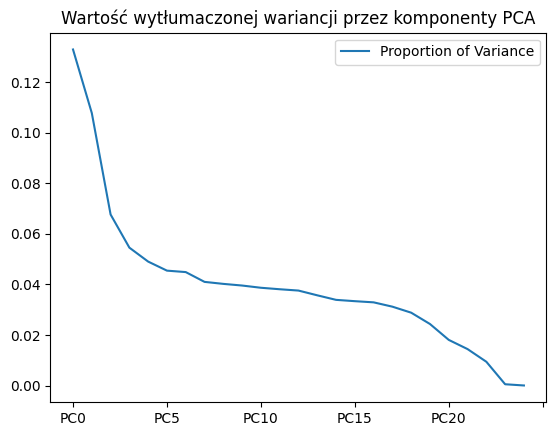

In [101]:
pca_summarize.T.plot.line(y=0)
plt.title('Wartość wytłumaczonej wariancji przez komponenty PCA')
plt.show()

In [76]:
for c in pca_summarize.columns:
    if pca_summarize.loc['Cumulative Proportion', c] >= 0.9:
        print(c)
        break

PC17


Sprawdzono dwa kryteria wyboru liczby komponentów do PCA. Metoda "łokcia" do wykresu nie wydaje się łatwa, gdyż nie ma dobrego miejsca zgięcia, dopiero po 23/24 komponentach, dlatego wybrano 18, zgodnie z drugim kryterium (Kryterium części wyjaśnionej wariancji).

In [77]:
pca = PCA(random_state = 123, n_components=18)
X_train_pca = pca.fit_transform(X_train_std)

In [78]:
X_test_pca = pca.transform(X_test_std)

In [79]:
print("XGBoost model score (test + balanced):", round(xgb_classifier(X_train_pca, y_train, X_test_pca, y_test, True),4)*100)
print("RandomForest model score (test + balanced):", round(rf_classifier(X_train_pca, y_train, X_test_pca, y_test, 'balanced'),4)*100)
print("LogisticRegression model score (test + balanced):", round(logistic_regression(X_train_pca, y_train, X_test_pca, y_test, 'balanced'),4)*100)
print("DecisionTree model score (test + balanced):", round(decision_tree(X_train_pca, y_train, X_test_pca, y_test, 'balanced'),4)*100)

XGBoost model score (test + balanced): 87.91
RandomForest model score (test + balanced): 89.18
LogisticRegression model score (test + balanced): 82.5
DecisionTree model score (test + balanced): 89.08


Wyniki nie są złe, ale są gorsze od uzyskanych wcześniej na zbiorze nie po PCA.

##### Wybór zmiennych z testu Chi-kwadrat

In [80]:
X_train_chi = X_train_imp3.loc[:, ['age', 'T3', 'sick', 'TSH', 'T4U', 'T3_measured', 'TT4', 'TSH_measured',
                                       'T4U_measured', 'TT4_measured', 'FTI_measured', 
                                     'FTI', 'sex', 'on_thyroxine', 'query_hypothyroid']]
X_test_chi = X_test_imp3.loc[:, ['age', 'T3', 'sick', 'TSH', 'T4U', 'T3_measured', 'TT4', 'TSH_measured',
                                       'T4U_measured', 'TT4_measured', 'FTI_measured', 
                                     'FTI', 'sex', 'on_thyroxine', 'query_hypothyroid']]

In [81]:
print("XGBoost model score (test + balanced):", round(xgb_classifier(X_train_chi, y_train, X_test_chi, y_test, True),4)*100)
print("RandomForest model score (test + balanced):", round(rf_classifier(X_train_chi, y_train, X_test_chi, y_test, 'balanced'),4)*100)
print("LogisticRegression model score (test + balanced):", round(logistic_regression(X_train_chi, y_train, X_test_chi, y_test, 'balanced'),4)*100)
print("DecisionTree model score (test + balanced):", round(decision_tree(X_train_chi, y_train, X_test_chi, y_test, 'balanced'),4)*100)

XGBoost model score (test + balanced): 97.14
RandomForest model score (test + balanced): 97.14
LogisticRegression model score (test + balanced): 89.5
DecisionTree model score (test + balanced): 97.24000000000001


#### Najlepszy zbiór

Jest to:
- imputacja iterative imputerem + moda
- wybranie najważniejszych zmiennych z testu Chi-kwadrat 
- porzucenie kolumn measured + kolumny TT4

In [82]:
print("XGBoost model score (test + balanced):", round(xgb_classifier(X_train_delmea4, y_train, X_test_delmea4, y_test, True),4)*100)
print("RandomForest model score (test + balanced):", round(rf_classifier(X_train_delmea4, y_train, X_test_delmea4, y_test, 'balanced'),4)*100)
print("LogisticRegression model score (test + balanced):", round(logistic_regression(X_train_delmea4, y_train, X_test_delmea4, y_test, 'balanced'),4)*100)
print("DecisionTree model score (test + balanced):", round(decision_tree(X_train_delmea4, y_train, X_test_delmea4, y_test, 'balanced'),4)*100)

XGBoost model score (test + balanced): 97.14
RandomForest model score (test + balanced): 97.35000000000001
LogisticRegression model score (test + balanced): 89.82
DecisionTree model score (test + balanced): 97.56


Drzewo decyzyjne ma najlepszy wynik w tym przypadku, jednak należy sprawdzić to dla poprawnych metryk.

/opt/miniconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Text(0.5, 1.0, 'Najlepszy zbiór dla modelu RandomForest')

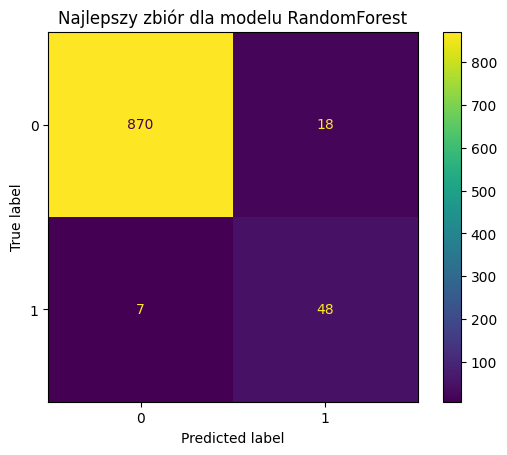

In [86]:
rf = RandomForestClassifier(random_state = 123,
                            n_estimators = 200,
                            max_depth = 4,
                            max_samples = 0.8,
                            criterion = 'log_loss',
                            class_weight='balanced')
rf.fit(X_train_delmea4, y_train)
disp = metrics.plot_confusion_matrix(rf, X_test_delmea4, y_test, values_format=".4g")
disp.ax_.set_title('Najlepszy zbiór dla modelu RandomForest')

/opt/miniconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Text(0.5, 1.0, 'Najlepszy zbiór dla modelu DecisionTree')

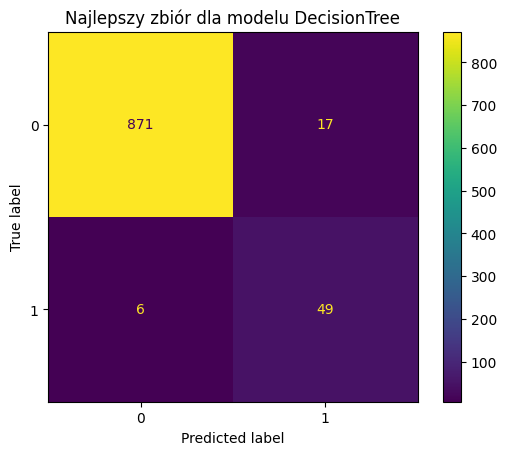

In [85]:
dt = DecisionTreeClassifier(criterion='gini',
                            random_state = 123,
                            max_depth = 7,
                            class_weight='balanced')
dt.fit(X_train_delmea4, y_train)
disp = metrics.plot_confusion_matrix(dt, X_test_delmea4, y_test, values_format=".4g")
disp.ax_.set_title('Najlepszy zbiór dla modelu DecisionTree')

"Drzewo" popełniło mniej błędów przy predykcji.

##### Automatyczny klasyfikator

Zdecydowano też sprawdzić model automatyczny, aby porównać z tymi co do tej pory samemu uzyskiwano.

In [87]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.metrics import make_scorer, roc_curve, auc, precision_recall_curve, average_precision_score, classification_report
from sklearn.feature_selection import SelectKBest
from imblearn.metrics import geometric_mean_score
from sklearn.model_selection import cross_val_score, KFold, GridSearchCV, RandomizedSearchCV
from tpot import TPOTClassifier
import warnings
warnings.filterwarnings('ignore')

/opt/miniconda3/lib/python3.9/site-packages/tpot/builtins/__init__.py:36: UserWarning: Warning: optional dependency `torch` is not available. - skipping import of NN models.
  warnings.warn("Warning: optional dependency `torch` is not available. - skipping import of NN models.")


In [88]:
GMscore = make_scorer(geometric_mean_score, average = 'binary')

Do ocen wybrano średnią geometryczną, która znana jest z tego, że poprawnie ocenia zbiory niezbalansowane.

In [90]:
tpot = TPOTClassifier(generations=5,verbosity=2, random_state=234, scoring=GMscore, n_jobs = -2)
tpot.fit(X_train_delmea4, y_train)

Optimization Progress:   0%|          | 0/600 [00:00<?, ?pipeline/s]

/opt/miniconda3/lib/python3.9/site-packages/tpot/builtins/__init__.py:36: UserWarning: Warning: optional dependency `torch` is not available. - skipping import of NN models.
  warnings.warn("Warning: optional dependency `torch` is not available. - skipping import of NN models.")
/opt/miniconda3/lib/python3.9/site-packages/tpot/builtins/__init__.py:36: UserWarning: Warning: optional dependency `torch` is not available. - skipping import of NN models.
  warnings.warn("Warning: optional dependency `torch` is not available. - skipping import of NN models.")
/opt/miniconda3/lib/python3.9/site-packages/tpot/builtins/__init__.py:36: UserWarning: Warning: optional dependency `torch` is not available. - skipping import of NN models.
  warnings.warn("Warning: optional dependency `torch` is not available. - skipping import of NN models.")
/opt/miniconda3/lib/python3.9/site-packages/tpot/builtins/__init__.py:36: UserWarning: Warning: optional dependency `torch` is not available. - skipping import 


Generation 1 - Current best internal CV score: 0.931316784727574

Generation 2 - Current best internal CV score: 0.9372245764964108

Generation 3 - Current best internal CV score: 0.9561034089099509

Generation 4 - Current best internal CV score: 0.9561034089099509

Generation 5 - Current best internal CV score: 0.9561034089099509

Best pipeline: XGBClassifier(XGBClassifier(XGBClassifier(input_matrix, learning_rate=0.001, max_depth=4, min_child_weight=7, n_estimators=100, n_jobs=1, subsample=0.8500000000000001, verbosity=0), learning_rate=0.001, max_depth=10, min_child_weight=20, n_estimators=100, n_jobs=1, subsample=0.5, verbosity=0), learning_rate=0.001, max_depth=9, min_child_weight=16, n_estimators=100, n_jobs=1, subsample=0.35000000000000003, verbosity=0)


TPOTClassifier(generations=5, n_jobs=-2, random_state=234,
               scoring=make_scorer(geometric_mean_score, average=binary),
               verbosity=2)

In [91]:
tpot.score(X_test_delmea4, y_test)

0.9067722273183448

In [92]:
rf = RandomForestClassifier(random_state = 123,
                            n_estimators = 200,
                            max_depth = 4,
                            max_samples = 0.8,
                            criterion = 'log_loss',
                            class_weight='balanced')
rf.fit(X_train_delmea4, y_train)

RandomForestClassifier(class_weight='balanced', criterion='log_loss',
                       max_depth=4, max_samples=0.8, n_estimators=200,
                       random_state=123)

In [93]:
y_pred = rf.predict(X_test_delmea4)
geometric_mean_score(y_test, y_pred, average='binary')

0.9246820291521054

In [99]:
dt = DecisionTreeClassifier(criterion='gini',
                            random_state = 123,
                            max_depth = 7,
                            class_weight='balanced'
                            )
dt.fit(X_train_delmea4, y_train)
geometric_mean_score(y_test, dt.predict(X_test_delmea4), average='binary')

0.9348012616879584

Okazuje się, że automatycznie znaleziony klasyfikator nie jest wcale lepszy od jednego z utworzonych ręcznie i testowanych wcześniej.

#### Wpływ transformacji na dane - wyniki na zbiorze treningowym


In [94]:
def examineTransformingInfluence(model, name, score):
    standarizer = StandardScaler()
    minmax = MinMaxScaler()
    standarizing_pipeline = make_pipeline(standarizer, model)
    normalizing_pipeline = make_pipeline(minmax, model)
    CVscores_no_transform = cross_val_score(model, X_train_delmea4, y_train, cv = KFold(5), scoring=score)
    CVscores_standarization = cross_val_score(standarizing_pipeline, X_train_delmea4, y_train, cv = KFold(5), scoring=score)
    CVscores_normalization = cross_val_score(normalizing_pipeline, X_train_delmea4, y_train, cv = KFold(5), scoring=score)
    print(name + ":")
    print('Średnia wyników bez transformacji: {0:.4f}, odchylenie standardowe: {1:.4f}'.format(CVscores_no_transform.mean(), CVscores_no_transform.std()))
    print('Średnia wyników po standaryzacji: {0:.4f}, odchylenie standardowe: {1:.4f}'.format(CVscores_standarization.mean(), CVscores_standarization.std()))
    print('Średnia wyników po normalizacji: {0:.4f}, odchylenie standardowe: {1:.4f}\n'.format(CVscores_normalization.mean(), CVscores_normalization.std()))

In [95]:
rf = RandomForestClassifier(random_state = 123,
                            n_estimators = 200,
                            max_depth = 4,
                            max_samples = 0.8,
                            criterion = 'log_loss',
                            class_weight='balanced')
examineTransformingInfluence(rf, 'Random Forest', GMscore)

Random Forest:
Średnia wyników bez transformacji: 0.9341, odchylenie standardowe: 0.0372
Średnia wyników po standaryzacji: 0.9341, odchylenie standardowe: 0.0372
Średnia wyników po normalizacji: 0.9341, odchylenie standardowe: 0.0372



In [96]:
lr = LogisticRegression(random_state=123,
                        class_weight='balanced',
                        max_iter = 1000)
examineTransformingInfluence(lr, 'Regresja Logistyczna', GMscore)

Regresja Logistyczna:
Średnia wyników bez transformacji: 0.8984, odchylenie standardowe: 0.0409
Średnia wyników po standaryzacji: 0.8990, odchylenie standardowe: 0.0410
Średnia wyników po normalizacji: 0.8729, odchylenie standardowe: 0.0355



Dla modeli drzewiastych standaryzacja i inne opcje transformacji nie mają wpływu i nie powinny, co pokazuje test przeprowadzony wyżej. Natomiast w przypadku regresji logistycznej standaryzacja daje najlepsze wyniki. Stąd można by ją stosować do zbioru dla tego modelu. Jednak jak sprawdzono wcześniej - regresja nie jest najlepsza dla tego zbioru, więc nie zostanie wybrana na ostateczny model. Na ten moment najlepszym klasyfikatorem okazuje się drzewo decyzyjne.